# Decision Trees 


#### Import libraries. If you don't have them installed, create new code cell, and write inline command like:
 %pip install numpy pandas scikit-learn matplotlib

In [97]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

We are going to work on iris dataset. It's a very popular training dataset, contatining information about three species of Iris. You can find out more under http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html (It also contains Exploratory data analysis. Might come in handy in the future ;) )

Let's get to know our dataset:

In [109]:
from sklearn.datasets import load_iris
df = pd.read_csv('iris.csv')
print('\nBasic info about dataset:\n')
print(df.info())
print('\nFirst 5 rows of dataset:\n', df.head())
print('\nStatistics of dataset:\n', df.describe())


Basic info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

First 5 rows of dataset:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6   

#### Splitting dataset. As we've mentioned, the best split is 70-30 or 80-20 train to test data. We are shufflig data, because as you can see above, the rows are sorted according to Species. Splitting without shuffling indexes would roughly lead to learning on first two categories and testing on 3rd.

In [99]:
from sklearn.model_selection import train_test_split

X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#### Training using entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = clf_entropy.predict(X_test)

print("Confusion Matrix: \n",
          confusion_matrix(y_test, y_pred))
print("\nAccuracy : \n",
        accuracy_score(y_test, y_pred)*100)
print("\nReport : \n",
        classification_report(y_test, y_pred))

Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy : 
 100.0

Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Visualising entropy values and splits

Entropy is calculated for the node

Sample is number of samples in node

Value shows class distribution

Class is the majority class in node=> Predicted class

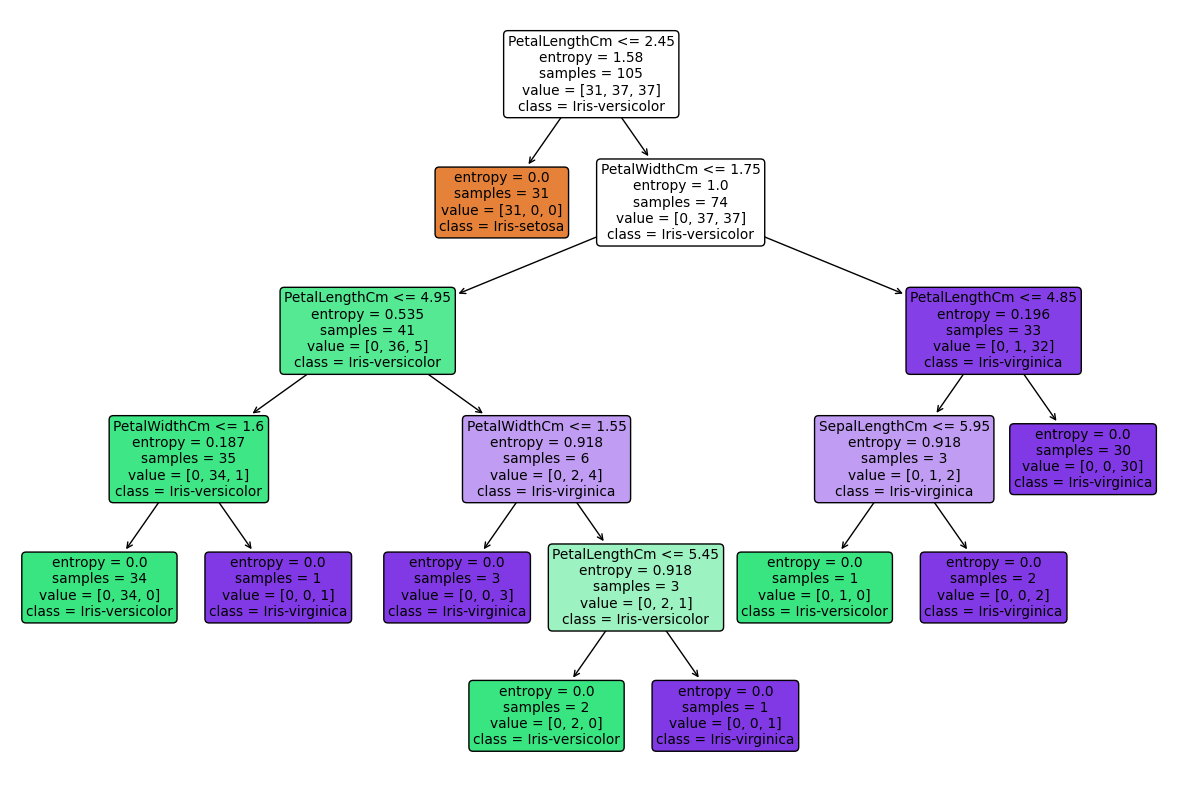

In [ ]:
from sklearn import tree

plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=np.unique(y.values), rounded=True)
plt.show()

### Preventing overfitting
Applying max_depth, min_samples_leaf

Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy : 
 100.0

Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



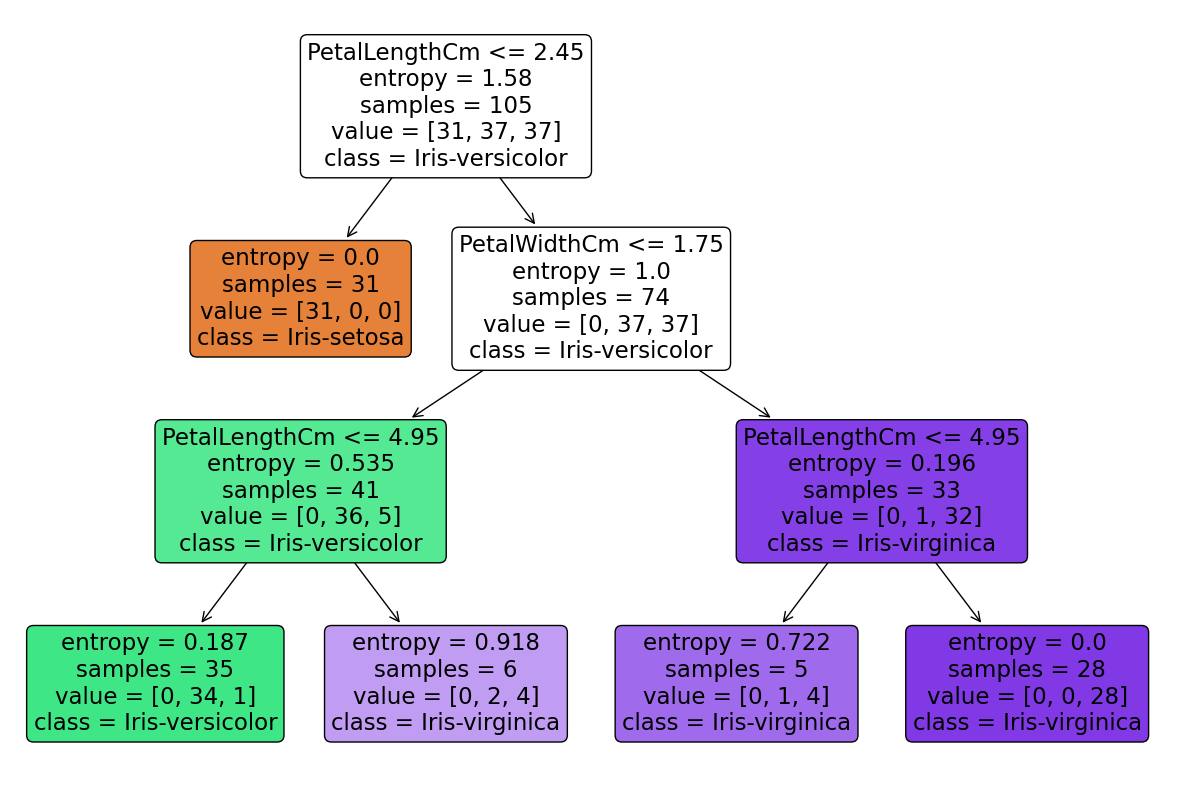

In [110]:
clf_entropy_depth = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)

clf_entropy_depth.fit(X_train, y_train)


#Prediction and measures
y_pred = clf_entropy_depth.predict(X_test)

print("Confusion Matrix: \n",
          confusion_matrix(y_test, y_pred))
print("\nAccuracy : \n",
        accuracy_score(y_test, y_pred)*100)
print("\nReport : \n",
        classification_report(y_test, y_pred))

#show tree    
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy_depth, filled=True, feature_names=X.columns, class_names=np.unique(y.values), rounded=True)
plt.show()


### Implementation of Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_forest = forest_clf.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

print(f'Random Forest Accuracy: {accuracy_forest * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix_forest)

Random Forest Accuracy: 100.00%
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Recreate the same steps on a dataset of your choosing.

examples: 
- https://www.kaggle.com/datasets/lovishbansal123/red-wine-quality
- https://www.kaggle.com/datasets/dalmacyali1905/game-of-thrones-classification-decision-tree
- https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees
- load_boston() from sklearn

Create decision tree using techniques for prevention of overfitting, visualise the tree. Next, create random forest. 

If you chose regression, use adequate criterion and measures (example:mse) 

You can experiment with Gini index (criterion='gini')

### If you have any questions, or want to have your code checked, write to me (Maria Musiał) on discord. 